<a href="https://colab.research.google.com/github/Singhbhijeet123/Lead_Score_Assignment/blob/main/Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEAD SCORING CASE STUDY - Logistic Regression Project**

## **Importing necessary librabries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading dataset**

In [ ]:
lead = pd.read_csv("/content/drive/MyDrive/4. Projects _ Assignments/Lead Scoring Case Study/Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
lead.shape

(9240, 37)

In [ ]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## **Cleaning Data set - Treating Null Values**

In [ ]:
lead = lead.replace("Select", np.nan)

In [ ]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

> **Dropping columns with more than 40% null values**

In [ ]:
lead = lead.drop(columns=["How did you hear about X Education","Lead Quality","Lead Profile",
                                  "Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score",
                                 "Asymmetrique Profile Score"])

In [ ]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

> **Treating Columns with null values less than 40%**

>> **Speacialisation Column**

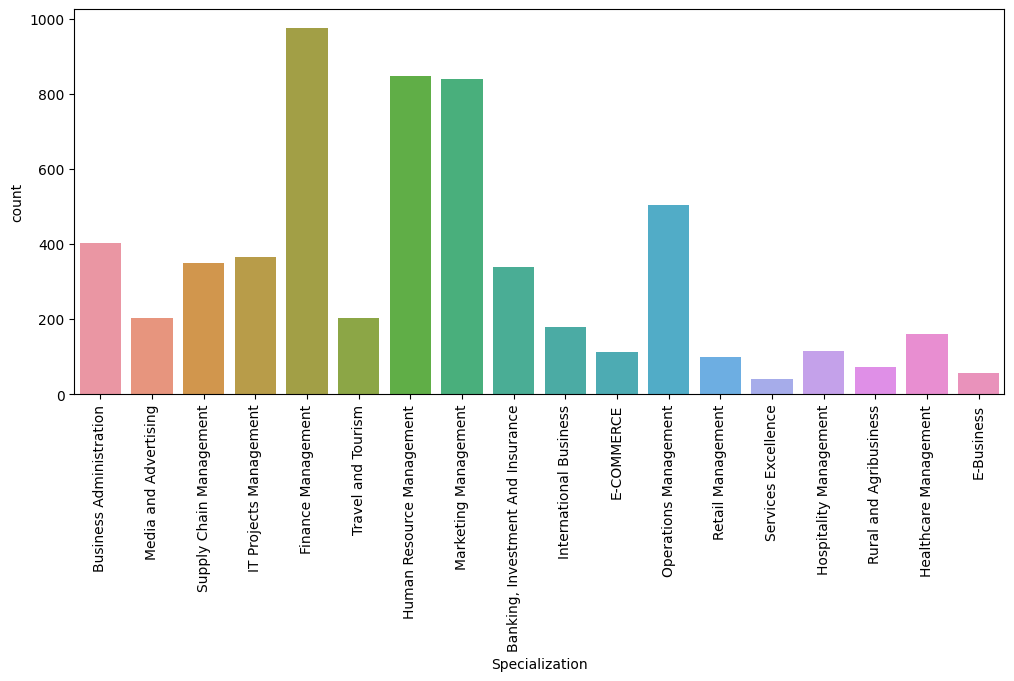

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=lead, x = "Specialization")
plt.xticks(rotation=90)
plt.show()

In [ ]:
lead.Specialization = lead.Specialization.replace(np.nan, "Others")

In [ ]:
lead.Specialization.value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

>> **Tags Column**

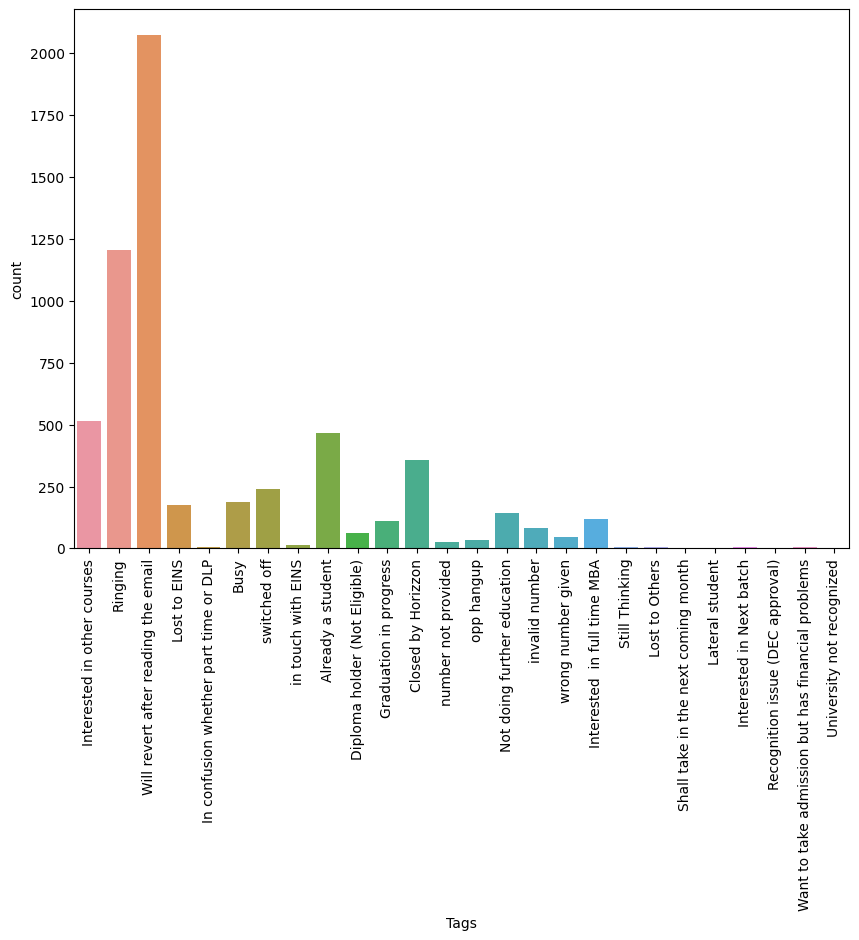

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=lead, x = "Tags")
plt.xticks(rotation=90)
plt.show()

In [ ]:
lead.Tags = lead.Tags.replace(np.nan,"Will revert after reading the email")

In [ ]:
lead.Tags.value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

>> **'What matters most to you in choosing a course' Column**

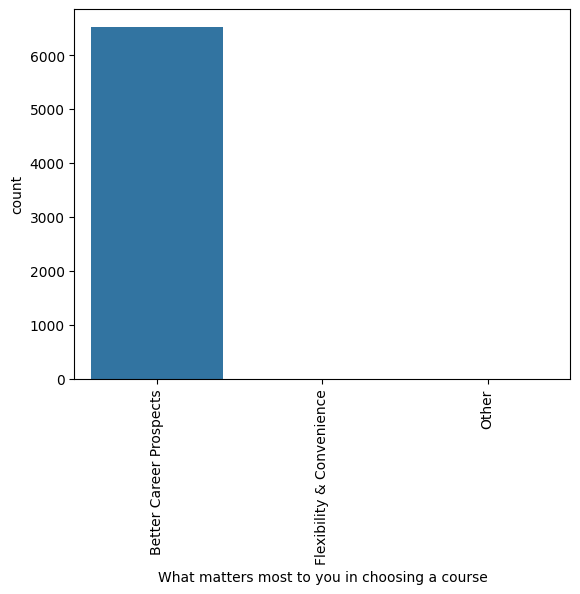

In [ ]:
sns.countplot(data=lead, x = "What matters most to you in choosing a course")
plt.xticks(rotation=90)
plt.show()

In [ ]:
round(lead["What matters most to you in choosing a course"].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [ ]:
# We will drop this column because it is highly skewed

In [ ]:
lead = lead.drop("What matters most to you in choosing a course",axis=1)

>> **What is your current occupation' Column**

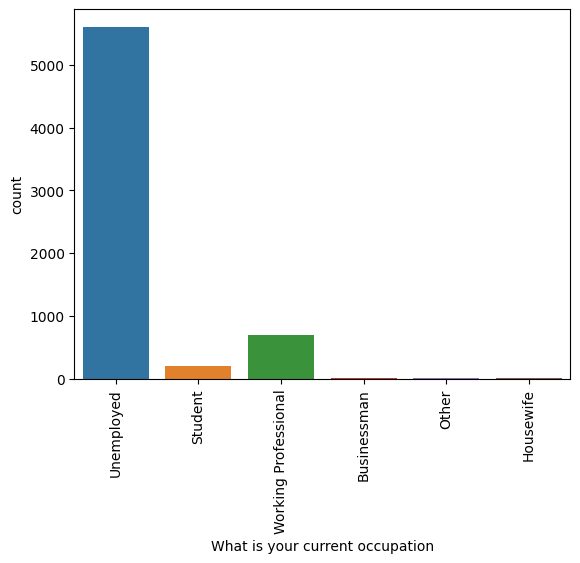

In [ ]:
sns.countplot(data=lead, x = "What is your current occupation")
plt.xticks(rotation=90)
plt.show()

In [ ]:
round(lead["What is your current occupation"].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [ ]:
# Replacing missing values with Unemployed (Mode)

In [ ]:
lead["What is your current occupation"]=lead["What is your current occupation"].replace(np.nan,"Unemployed")

In [ ]:
lead["What is your current occupation"]

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238    Unemployed
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object

>> **Country column**

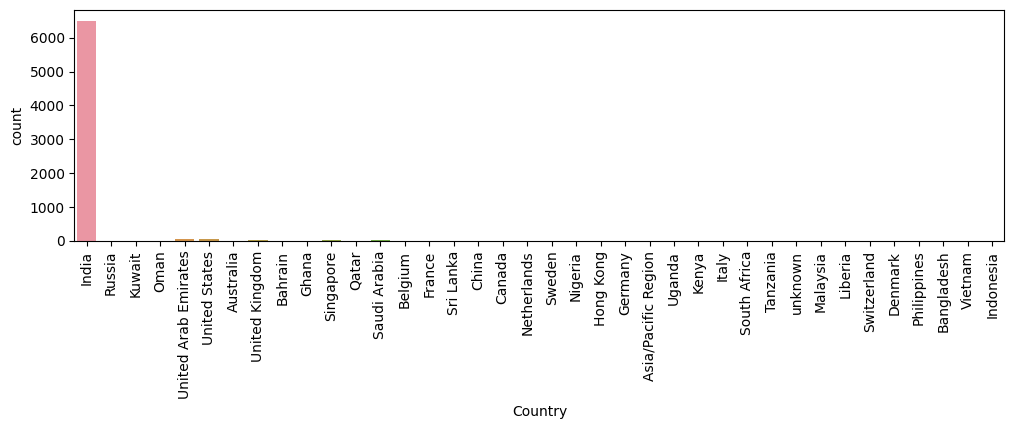

In [ ]:
plt.figure(figsize=(12,3))
sns.countplot(data=lead, x = "Country")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Replacing missing values with India (Mode)

In [ ]:
lead.Country = lead.Country.replace(np.nan,"India")

>> **City Column**

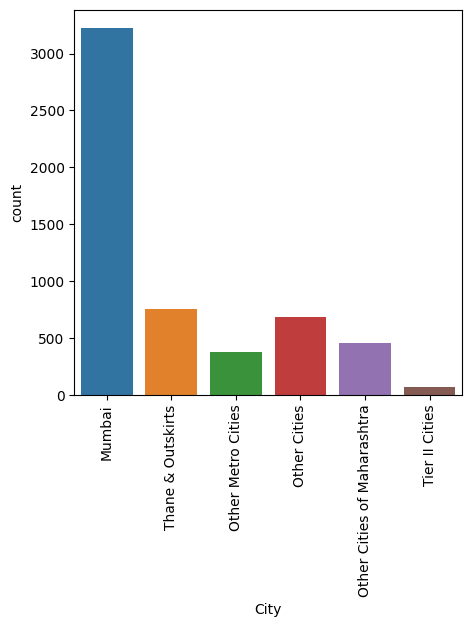

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=lead, x ="City")
plt.xticks(rotation=90)
plt.show()

In [ ]:
round(lead.City.value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [ ]:
# Replacing missing values with Mumbai (Mode)

In [ ]:
lead.City =lead.City.replace(np.nan,"Mumbai")

In [ ]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

There are 3 columns with just 1% missing values, Therefore we will drop rows for these NaN values

In [ ]:
lead.dropna(inplace = True)

In [ ]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [ ]:
# All missing values cleared; Clean data set ready
(len(lead.index)/9240)*100
# We have retained 98.2% of data

98.2034632034632

## **EDA**

**Univariate / Bivariate Analysis**

> **Traget Variable - Converted Column**

In [ ]:
Converted = (sum(lead.Converted)/len(lead.Converted.index))*100
Converted

37.85541106458012

*Analysis: Conversion rate is 37.9% i.e almost equal to 38%*

> **Lead Origin Column**

In [ ]:
Pinks = ["#CD1076", "#8B0A50"]

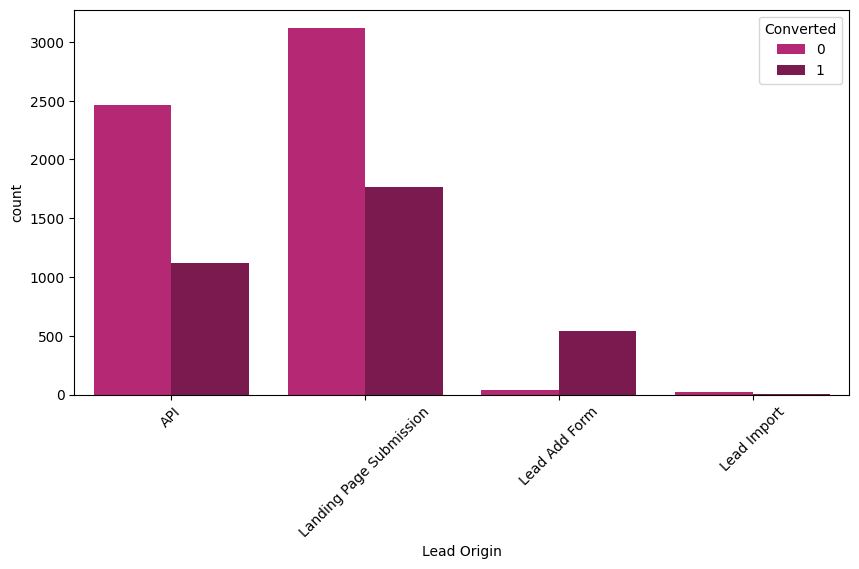

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead, x = "Lead Origin", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 45)
plt.show()

*Analysis: Leads generation and Conversion ratio is good for API and Landing Page Submission. Conversion rate via Lead ad form is also quite good.*

> **Lead Origin Column**


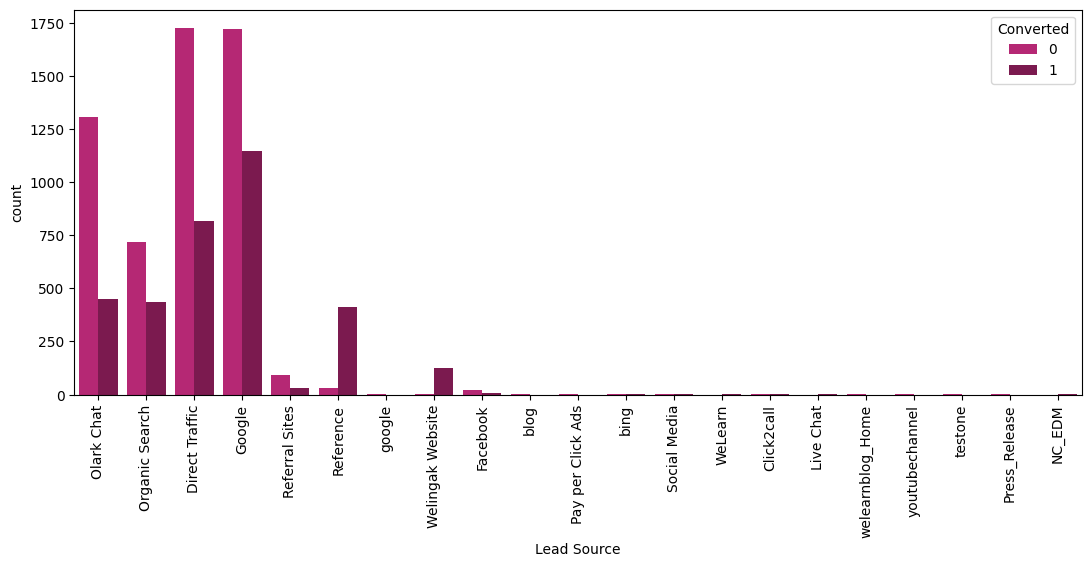

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(data = lead, x = "Lead Source", hue = "Converted", palette= Pinks)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead["Lead Source"] = lead["Lead Source"].replace(["Click2call", "Live Chat", "NC_EDM", "WeLearn", "bing", "blog", "testone", "welearnblog_Home"], "Others")

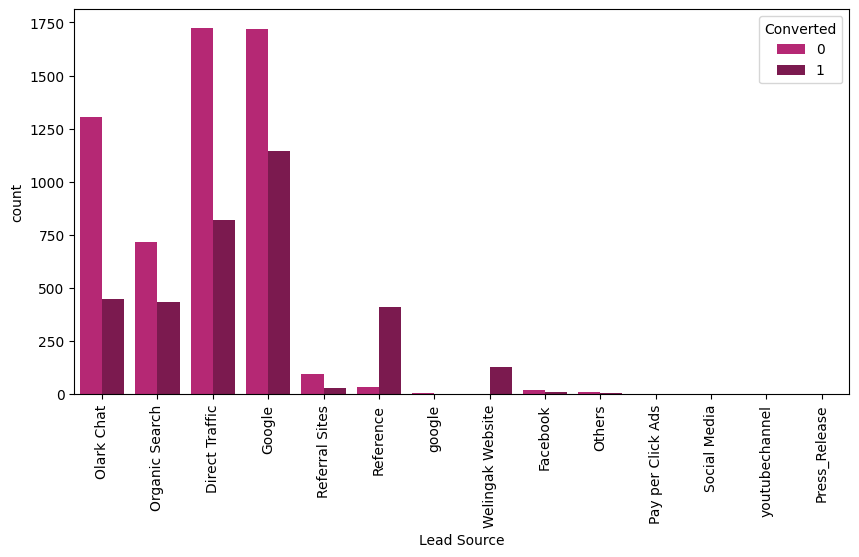

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead, x = "Lead Source", hue = "Converted", palette= Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis:*
- *Google and Direct traffic generates maximum number of leads.*
- *Conversions through reference leads is vero good.*
- *Leads through Wellingak website.*

> **Do Not Email Column**

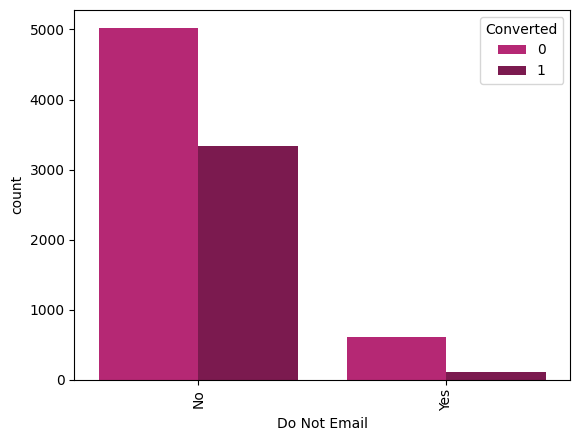

In [ ]:
sns.countplot(data = lead, x = "Do Not Email", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis: Most answers are No*

> **Total Visits Column**

In [ ]:
lead["TotalVisits"].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

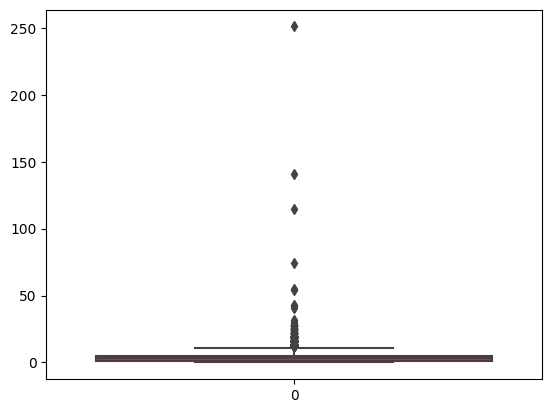

In [ ]:
sns.boxplot(lead.TotalVisits, palette = Pinks)
plt.show()

In [ ]:
# Capping
percentiles = lead.TotalVisits.quantile([0.05,0.95]).values
lead.TotalVisits[lead.TotalVisits <= percentiles[0]] = percentiles[0]
lead.TotalVisits[lead.TotalVisits >= percentiles[1]] = percentiles[1]

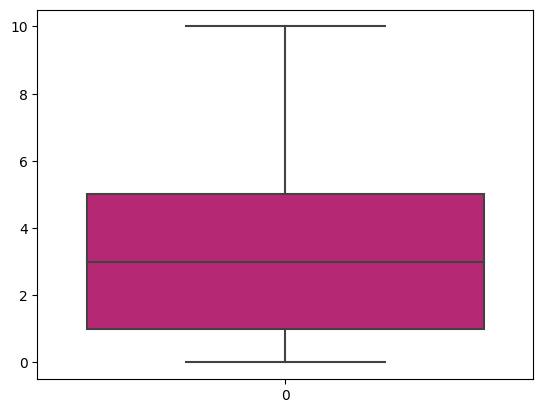

In [ ]:
sns.boxplot(lead.TotalVisits, palette = Pinks)
plt.show()

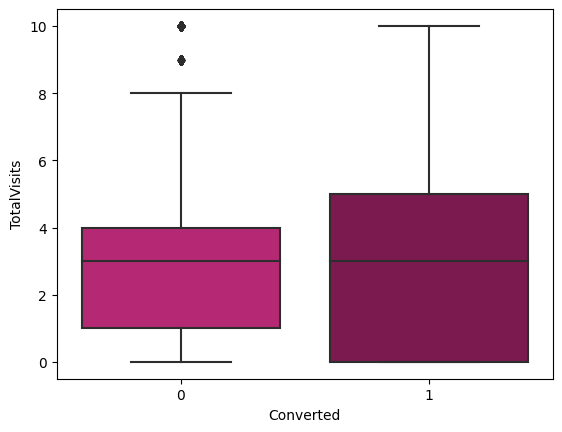

In [ ]:
# Comapring Total Visits column against Target Variable
sns.boxplot(data = lead, y = "TotalVisits", x = "Converted", palette = Pinks)
plt.show()

*Analysis: Median for conversions and Non- Conversions is the same. However, volumes of conversions are higher.*

> **Total Spent on Website Column**

In [ ]:
lead["Total Time Spent on Website"].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

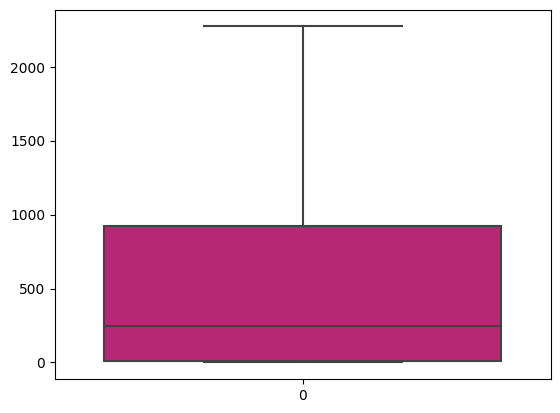

In [ ]:
sns.boxplot(lead["Total Time Spent on Website"], palette = Pinks)
plt.show()

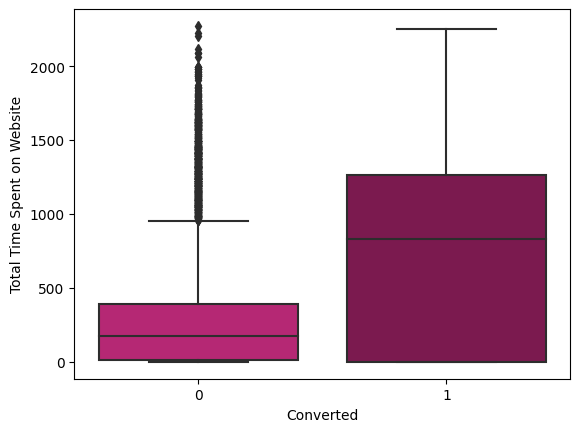

In [ ]:
# Comapring Total Time Spent on Website column against Target Variable
sns.boxplot(data = lead, y = "Total Time Spent on Website", x = "Converted", palette = Pinks)
plt.show()

*Analysis:*

*The graph gives an inference that people who spend more time on the website are more likely to get converted.*

***A good website is more likely to get higher conversions***

> **Page Views per Visit Column**

In [ ]:
lead["Page Views Per Visit"].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

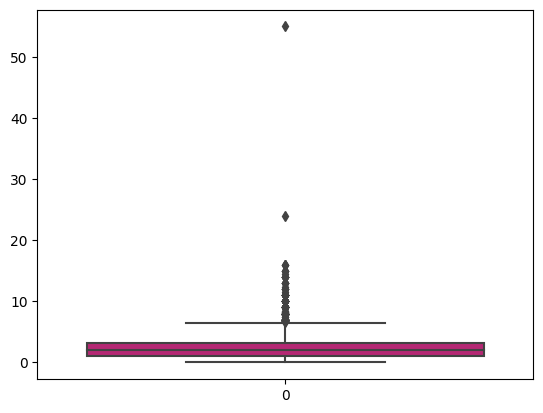

In [ ]:
sns.boxplot(lead["Page Views Per Visit"], palette = Pinks)
plt.show()

In [ ]:
# Capping Outliers
percentiles = lead["Page Views Per Visit"].quantile([0.05,0.95]).values
lead["Page Views Per Visit"][lead["Page Views Per Visit"] <= percentiles[0]] = percentiles[0]
lead["Page Views Per Visit"][lead["Page Views Per Visit"] >= percentiles[1]] = percentiles[1]


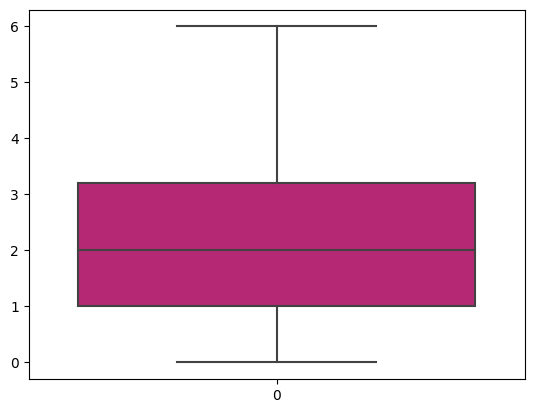

In [ ]:
sns.boxplot(lead["Page Views Per Visit"], palette = Pinks)
plt.show()

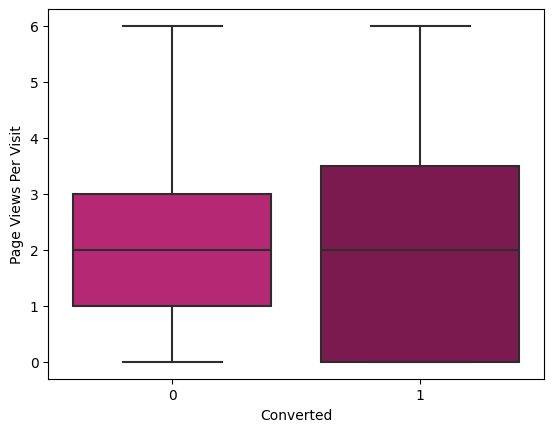

In [ ]:
# Comapring Page Views Per Visit column against Target Variable
sns.boxplot(data = lead, y = "Page Views Per Visit", x = "Converted", palette = Pinks)
plt.show()

*Analysis: Median for conversions and Non- Conversions is the same. However, volumes of conversions are higher.*

> **Last Activity Column**

In [ ]:
lead["Last Activity"].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

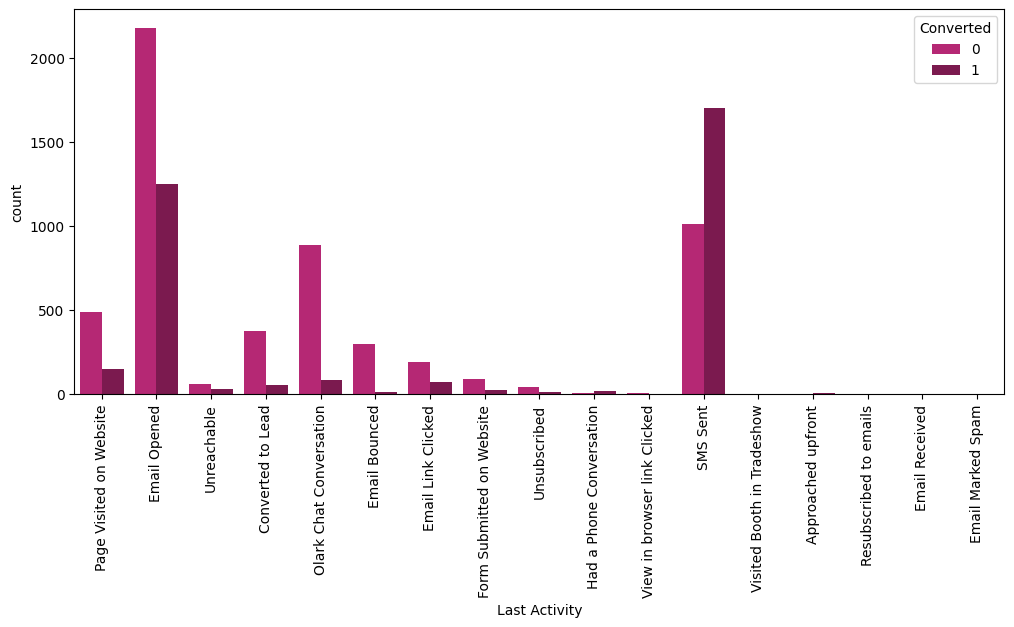

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data = lead, x = "Last Activity", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
lead["Last Activity"] = lead["Last Activity"].replace(["View in browser link Clicked", "Visited Booth in Tradeshow", "Approached upfront","Resubscribed to emails","Email Received", "Email Marked Spam"], "Other_Activities")

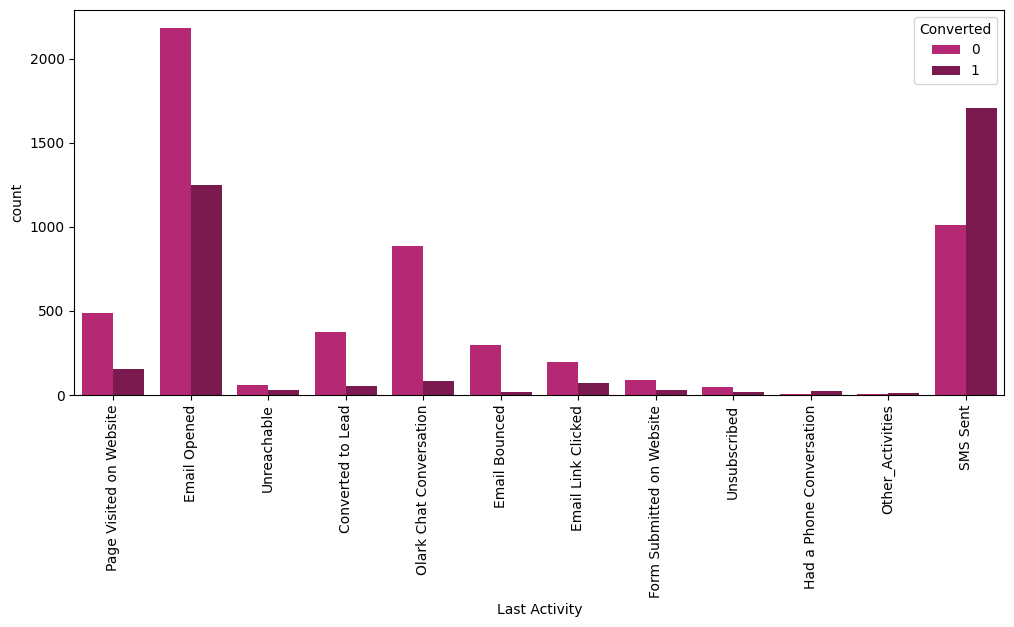

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data = lead, x = "Last Activity", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis:*
- *The Visualisation shows that Email is highly used and mostly the last activity*
- *While SMS follows right after with great lead generations conversions*

> **Country Column**

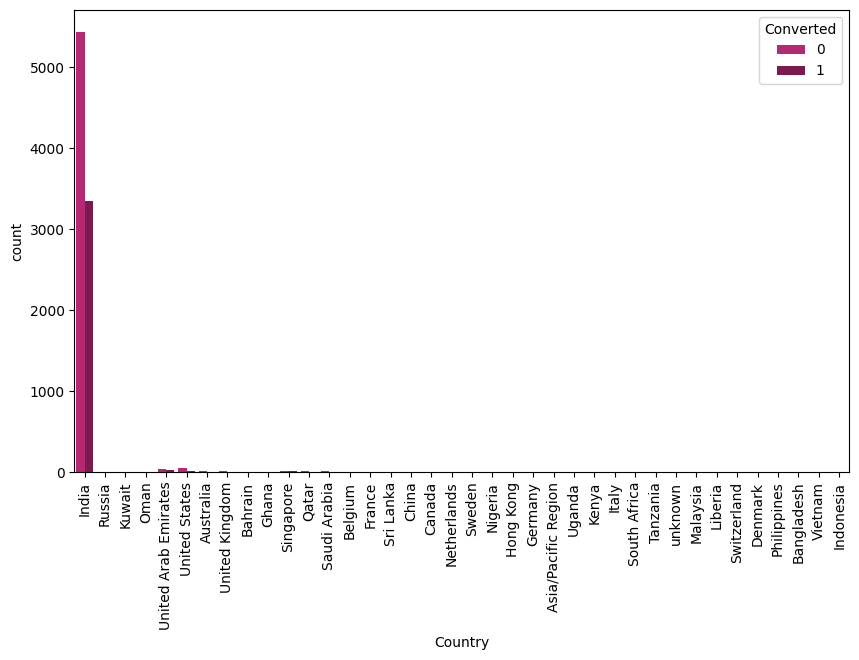

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = lead, x = "Country", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis: Majority responses are from India. A small number from UAE and USA.*

> **Specialization Column**

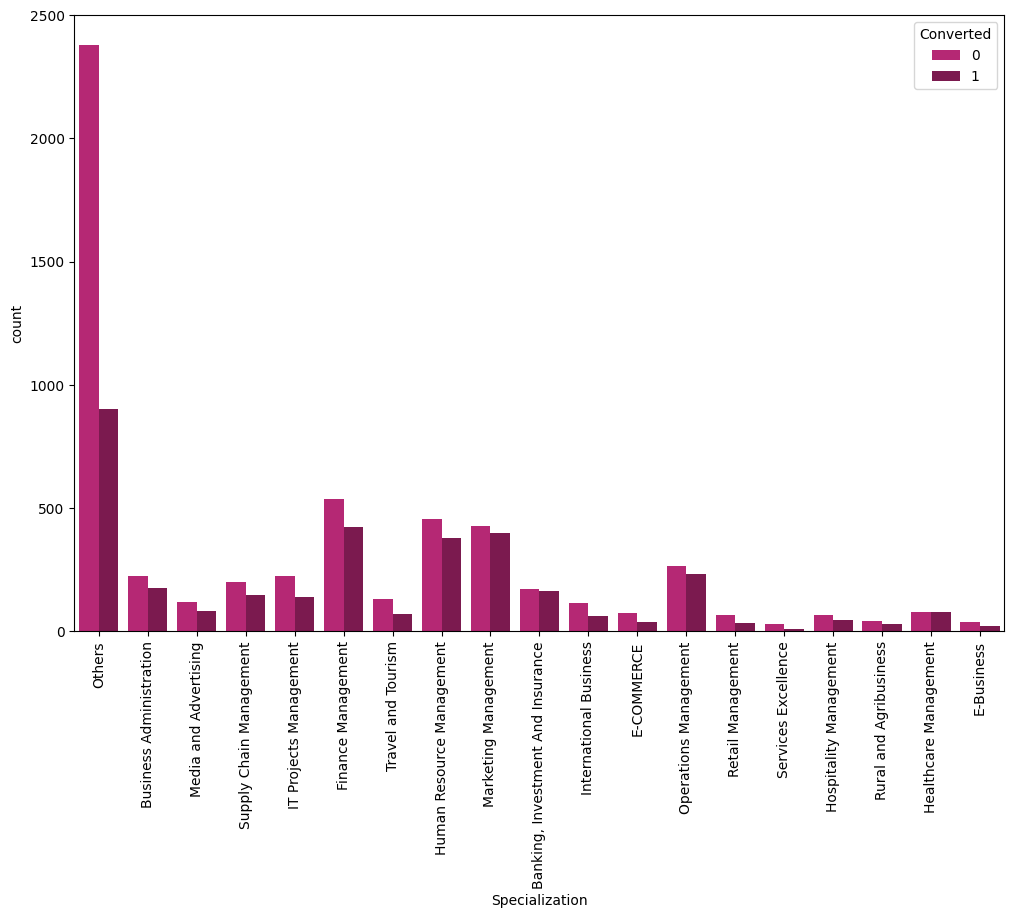

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot( data = lead, x = "Specialization", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

> **What is your current occupation Column**

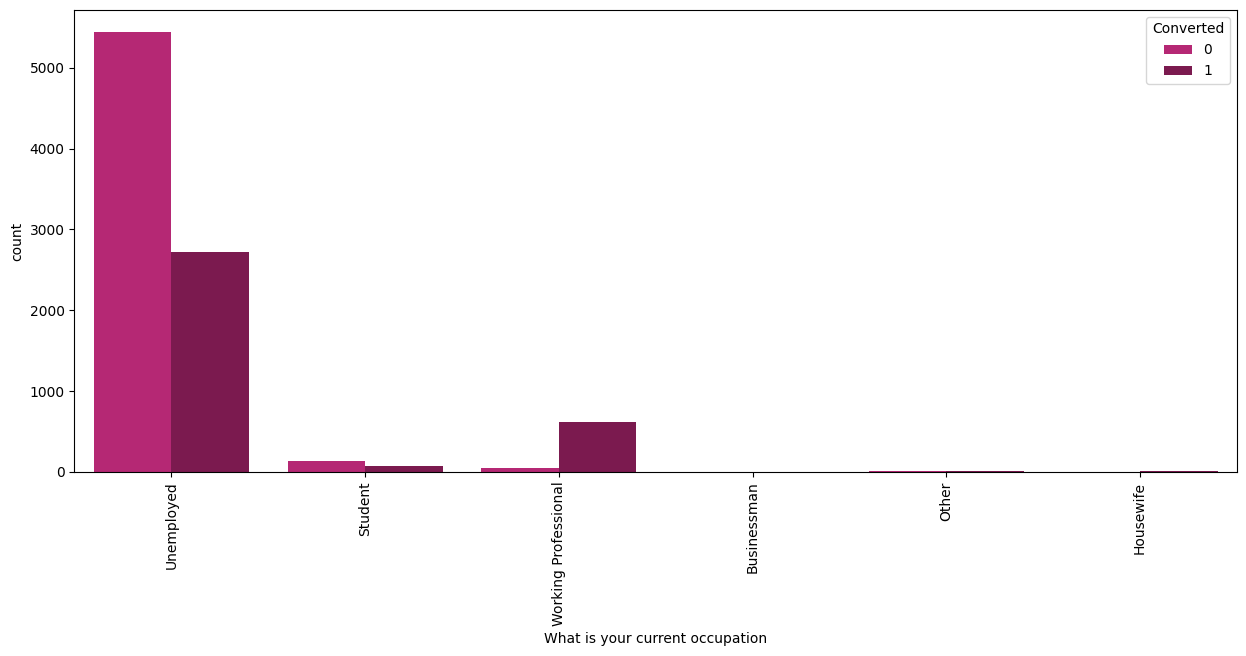

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data = lead, x = "What is your current occupation", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis: Working professionals are more likely to convert to customers i.e.e join course while Unemployed people are also highly intrested but approximately around 50% only get converted into customers and users.*

> **Search Column**

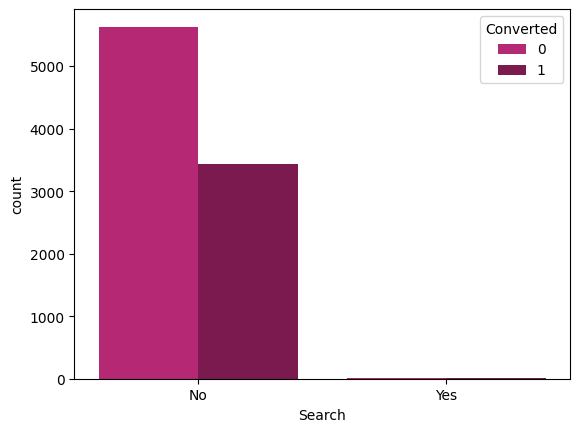

In [ ]:
sns.countplot(data = lead, x = "Search", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Magazine Column**

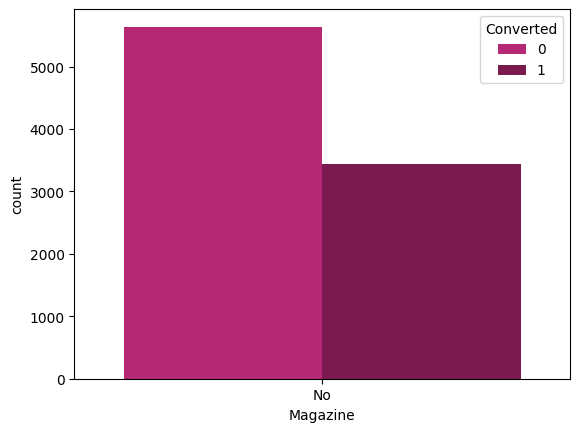

In [ ]:
sns.countplot(data = lead, x = "Magazine", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Newspaper Article Column**

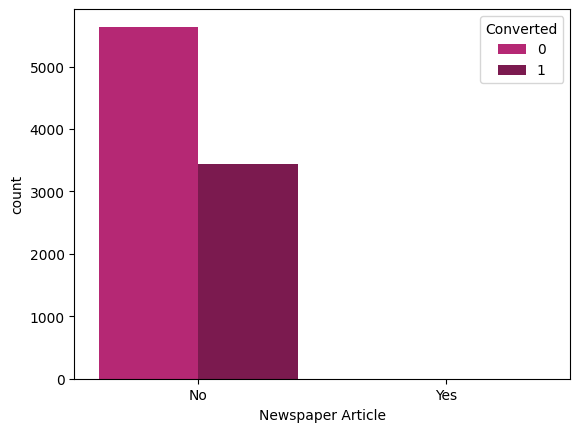

In [ ]:
sns.countplot(data = lead, x = "Newspaper Article", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **X Education Forums Column**

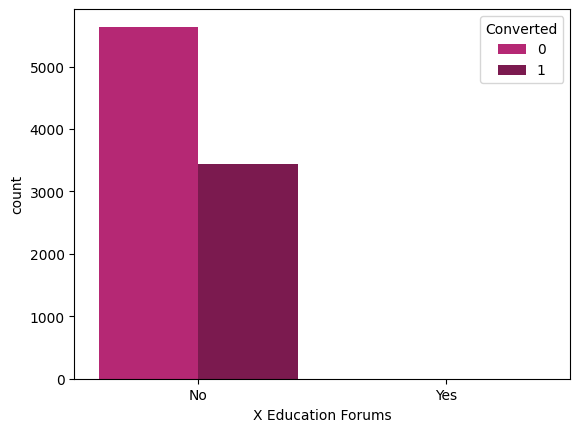

In [ ]:
sns.countplot(data = lead, x = "X Education Forums", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Newspaper Column**

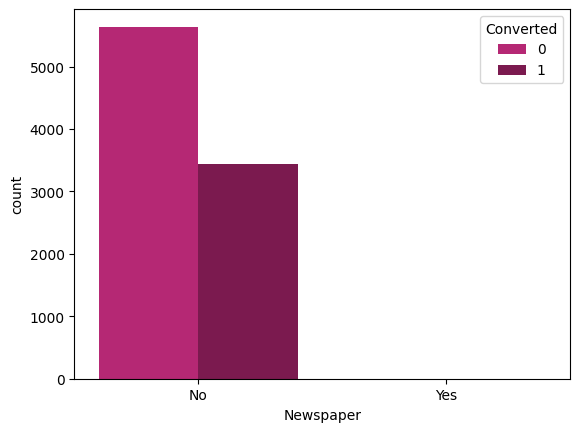

In [ ]:
sns.countplot(data = lead, x = "Newspaper", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Digital Advertisement Column**

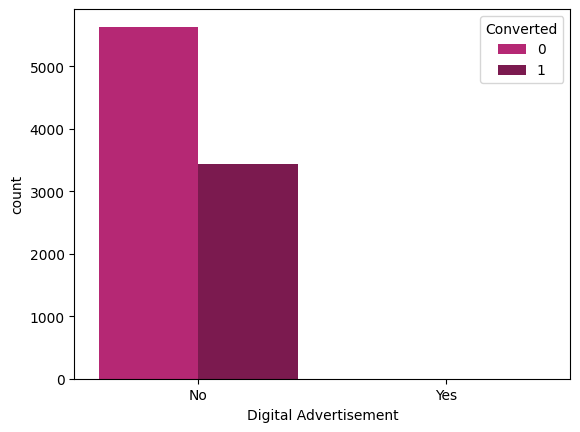

In [ ]:
sns.countplot(data = lead, x = "Digital Advertisement", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Through Reccomendations Column**

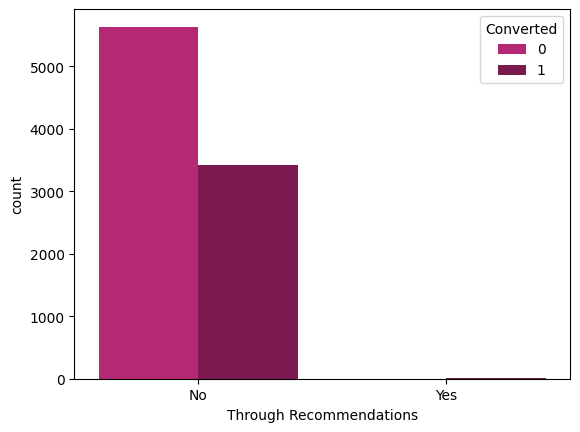

In [ ]:
sns.countplot(data = lead, x = "Through Recommendations", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Receive More Updates About Our Courses Column**

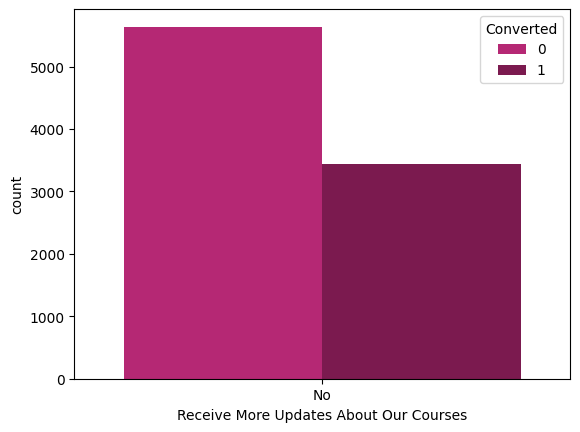

In [ ]:
sns.countplot(data = lead, x = "Receive More Updates About Our Courses", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Tags Column**

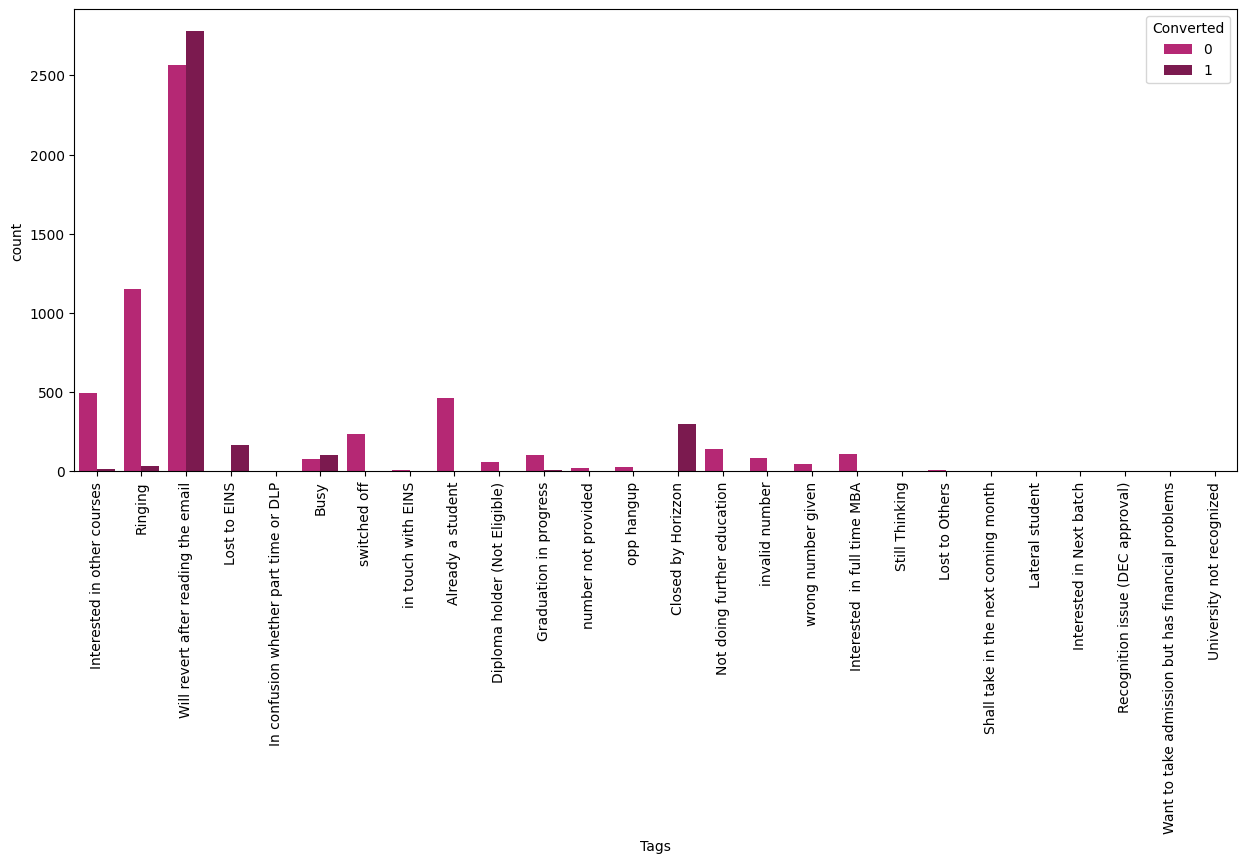

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data = lead, x = "Tags", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis: The highest response to the sales team is that target audience will revert after reading the email. Many accounts are closed by Horizonn*

> **Update me on Supply Chain content Column**

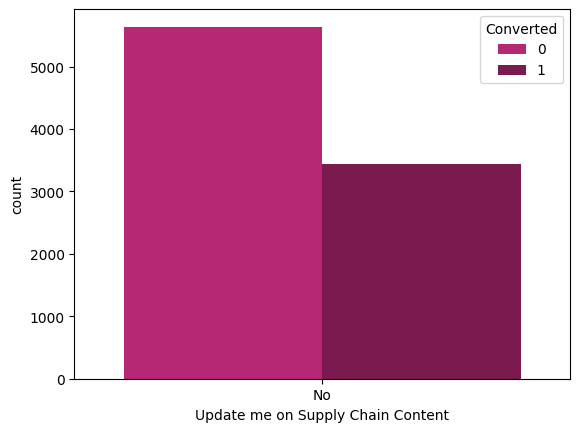

In [ ]:
sns.countplot(data = lead, x = "Update me on Supply Chain Content", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **Get updates on DM content Column**

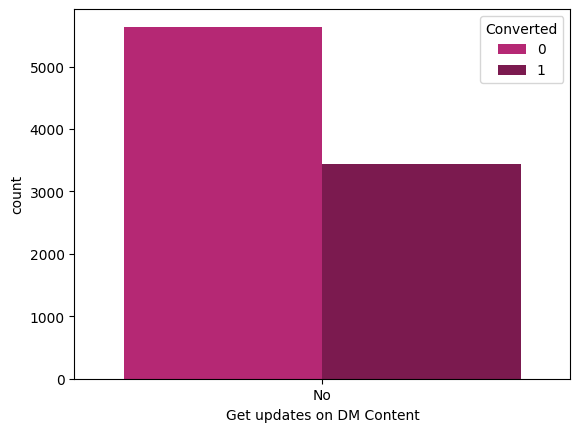

In [ ]:
sns.countplot(data = lead, x = "Get updates on DM Content", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **City Column**

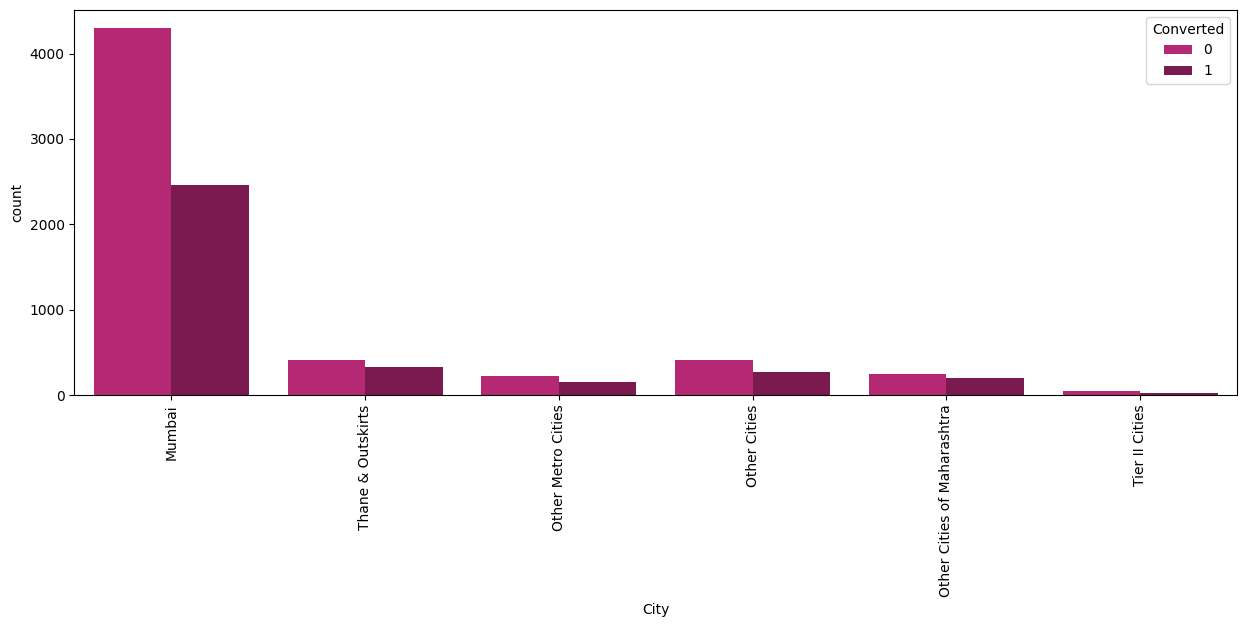

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = lead, x = "City", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis: Maximum number of leads and conversions are from Mumbai. Followed by Thane and outskirts, Other cities, Other cities of Maharashtra, Other metro cities and Tier 2 cities*

> **I agree to pay the amount through cheque Column**

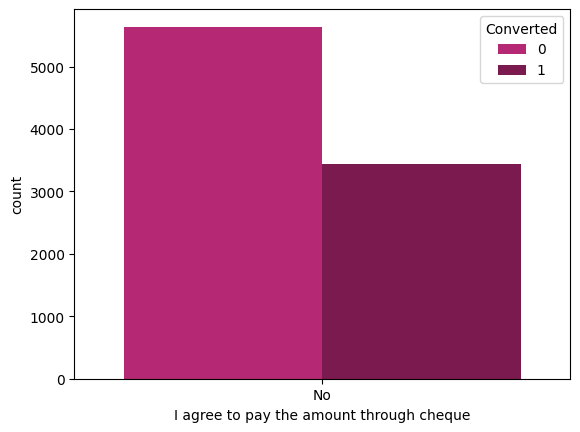

In [ ]:
sns.countplot(data = lead, x = "I agree to pay the amount through cheque", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Most answers are No*

> **A free copy of Mastering The Interview Column**

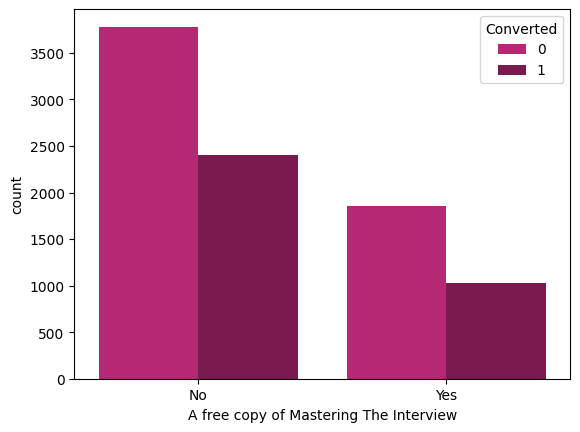

In [ ]:
sns.countplot(data = lead, x = "A free copy of Mastering The Interview", hue = "Converted", palette = Pinks)
plt.show()

*Analysis: Response in No is higher than Yes*

> **Last notable activity Column**

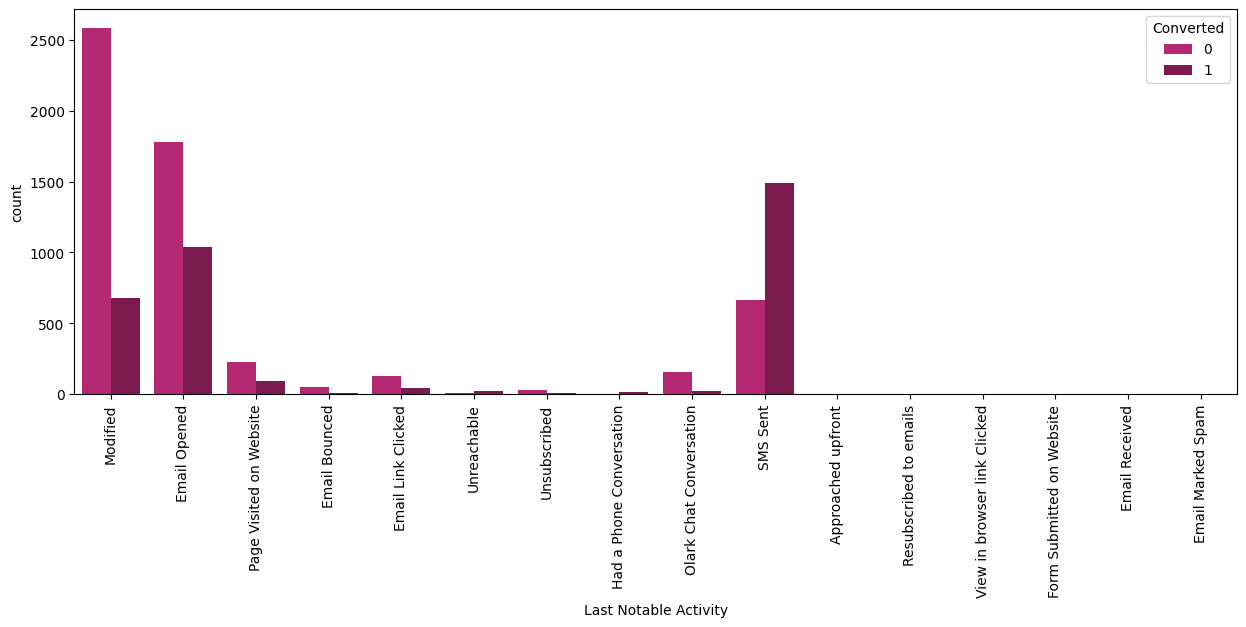

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = lead, x = "Last Notable Activity", hue = "Converted", palette = Pinks)
plt.xticks(rotation = 90)
plt.show()

*Analysis: As made earlier, Email opening is the most recent activity by majority of the people. Followed by SMS Sent and other options.*

## **Manually Dropping Columns that do not assist us in model building**

In [ ]:
lead = lead.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [ ]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [ ]:
lead.shape

(9074, 14)

Now, we are left with 14 usable columns.

##  **Preparing the Data for Regression Modeling**

> **Converting Yes/No values to Binary Variables**

In [ ]:
vars =  ["Do Not Email", "Do Not Call"]

def text_to_binary(x):
    return x.map({"Yes": 1, "No": 0})

lead[vars] = lead[vars].apply(text_to_binary)

In [ ]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


> **Creating Dummy Variables**

In [ ]:
vars = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']], drop_first=True)
vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Concatenating Dummy variable columns and our lead dataframe
lead = pd.concat([lead, vars], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Dropping orginal columns for who dummy variables are created
lead = lead.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization","What is your current occupation", "City","Last Notable Activity"], axis = 1)

In [ ]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


> **Splitting into Train and Test Sets**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y = lead["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

> **Rescaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instatiating an object

scaler = StandardScaler()
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#2. Fit on data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,4.363276e-17,-2.908851e-17,2.153668e-17,0.535979,0.068651,0.003779,0.003936,0.320107,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.269581,0.017744,1.000079e+00,1.000079e+00,1.000079e+00,0.498743,0.252879,0.061362,0.062622,0.466554,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,-1.150329e+00,-8.886503e-01,-1.265540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.915538e-01,-8.703028e-01,-7.102788e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-7.400339e-02,-4.354671e-01,-1.550176e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,6.435470e-01,8.002366e-01,5.834798e-01,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.437423e+00,3.195502e+00,2.066027e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Building the Model**



## **Variable Selection using RFE**

In [ ]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False])

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 37),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 55),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 30),
 ('Lead Source_youtubechannel', False, 36),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on W

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activities', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

# **Manual Variable Selection**

In [ ]:
import statsmodels.api as sm

> **Model 1**




In [ ]:
#add constant
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.5
Date:                Sat, 14 Oct 2023   Deviance:                       5181.0
Time:                        13:22:14   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3532      0.245      1.444      0.149      -0.126       0.833
Do Not Email                                            -1.6739      0.190     -8.796      0.000      -2.047      -1.301
Total Time Spent on Website                              1.1085      0.041     27.204      0.000       1.029       1.188
Lead Origin_Landing Page Submission                     -1.1286      0.129     -8.732      0.000      -1.382      -0.875
Lead Origin_Lead Add Form                                1.5991      0.915      1.748      0.080      -0.193       3.392
Lead Origin_Lead Import                                  0.9028      0.480      1.881      0.060      -0.038       1.844
Lead Source_Olark Chat                                   1.1249      0.124      9.077      0.000       0.882       1.368
Lead Source_Reference                                    1.7717      0.938      1.889      0.059      -0.066       3.610
Lead Source_Welingak Website                             4.2995      1.165      3.690      0.000       2.016       6.583
Last Activity_Had a Phone Conversation                   2.4056      1.156      2.080      0.038       0.139       4.672
Last Activity_Olark Chat Conversation                   -0.9507      0.172     -5.535      0.000      -1.287      -0.614
Last Activity_Other_Activities                           1.7204      0.602      2.856      0.004       0.540       2.901
Last Activity_SMS Sent                                   1.3450      0.076     17.759      0.000       1.197       1.493
Last Activity_Unsubscribed                               1.4062      0.483      2.912      0.004       0.460       2.353
Specialization_Others                                   -1.1484      0.126     -9.124      0.000      -1.395      -0.902
What is your current occupation_Housewife               22.2453   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Unemployed              -0.5192      0.218     -2.383      0.017      -0.946      -0.092
What is your current occupation_Working Professional     2.1159      0.287      7.370      0.000       1.553       2.679
Last Notable Activity_Had a Phone Conversation           0.8863      1.596      0.555      0.579      -2.241       4.014
Last Notable Activity_Modified                          -0.8665      0.082    -10.613      0.000      -1.027      -0.707
Last Notable Activity_Unreachable                        1.5824      0.475      3.329      0.001       0.651       2.514
========================================================================================================================
"""

*-**Reading:** Many values with high p value but highest is 'What is your current occupation_Housewife' variable.
Therefore we are going to drop this variable.*

In [ ]:
# dropping What is your current occupation_Housewife variable
col1 = col.drop("What is your current occupation_Housewife")

> **Model 2**

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model2 = logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.6
Date:                Sat, 14 Oct 2023   Deviance:                       5187.1
Time:                        13:22:14   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4371      0.240      1.820      0.069      -0.034       0.908
Do Not Email                                            -1.6766      0.190     -8.812      0.000      -2.050      -1.304
Total Time Spent on Website                              1.1077      0.041     27.208      0.000       1.028       1.187
Lead Origin_Landing Page Submission                     -1.1279      0.129     -8.734      0.000      -1.381      -0.875
Lead Origin_Lead Add Form                                1.5989      0.914      1.748      0.080      -0.193       3.391
Lead Origin_Lead Import                                  0.9017      0.480      1.879      0.060      -0.039       1.842
Lead Source_Olark Chat                                   1.1225      0.124      9.061      0.000       0.880       1.365
Lead Source_Reference                                    1.7805      0.938      1.899      0.058      -0.057       3.618
Lead Source_Welingak Website                             4.3008      1.165      3.691      0.000       2.017       6.584
Last Activity_Had a Phone Conversation                   2.4072      1.156      2.082      0.037       0.141       4.674
Last Activity_Olark Chat Conversation                   -0.9527      0.172     -5.545      0.000      -1.289      -0.616
Last Activity_Other_Activities                           1.7211      0.602      2.857      0.004       0.540       2.902
Last Activity_SMS Sent                                   1.3431      0.076     17.734      0.000       1.195       1.492
Last Activity_Unsubscribed                               1.4079      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1504      0.126     -9.146      0.000      -1.397      -0.904
What is your current occupation_Unemployed              -0.6010      0.213     -2.822      0.005      -1.018      -0.184
What is your current occupation_Working Professional     2.0330      0.283      7.176      0.000       1.478       2.588
Last Notable Activity_Had a Phone Conversation           0.8817      1.596      0.553      0.581      -2.245       4.009
Last Notable Activity_Modified                          -0.8683      0.082    -10.639      0.000      -1.028      -0.708
Last Notable Activity_Unreachable                        1.5799      0.475      3.323      0.001       0.648       2.512
========================================================================================================================
"""

*-**Reading:** The P value of 'Last Notable Activity_Had a Phone Conversation' variable is high.
Therefore we are going to drop this variable.*

In [ ]:
# dropping Last Notable Activity_Had a Phone Conversation variable
col1 = col1.drop("Last Notable Activity_Had a Phone Conversation")

> **Model 3**

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model3 = logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.7
Date:                Sat, 14 Oct 2023   Deviance:                       5187.4
Time:                        13:22:14   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4377      0.240      1.823      0.068      -0.033       0.908
Do Not Email                                            -1.6784      0.190     -8.823      0.000      -2.051      -1.306
Total Time Spent on Website                              1.1074      0.041     27.203      0.000       1.028       1.187
Lead Origin_Landing Page Submission                     -1.1276      0.129     -8.733      0.000      -1.381      -0.875
Lead Origin_Lead Add Form                                1.5990      0.915      1.748      0.080      -0.193       3.391
Lead Origin_Lead Import                                  0.9019      0.480      1.879      0.060      -0.039       1.843
Lead Source_Olark Chat                                   1.1233      0.124      9.067      0.000       0.880       1.366
Lead Source_Reference                                    1.7811      0.938      1.899      0.058      -0.057       3.619
Lead Source_Welingak Website                             4.3024      1.165      3.692      0.000       2.019       6.586
Last Activity_Had a Phone Conversation                   2.9067      0.761      3.820      0.000       1.415       4.398
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.537      0.000      -1.288      -0.615
Last Activity_Other_Activities                           1.7223      0.602      2.859      0.004       0.541       2.903
Last Activity_SMS Sent                                   1.3431      0.076     17.732      0.000       1.195       1.492
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1522      0.126     -9.163      0.000      -1.399      -0.906
What is your current occupation_Unemployed              -0.6007      0.213     -2.820      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0332      0.283      7.176      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8706      0.082    -10.678      0.000      -1.030      -0.711
Last Notable Activity_Unreachable                        1.5791      0.475      3.321      0.001       0.647       2.511
========================================================================================================================
"""

*-**Reading:** P value of'Lead Origin_Lead Add Form' variable is high.
Therefore we are going to drop this variable.*

In [ ]:
# dropping Lead Origin_Lead Add Form variable
col1 = col1.drop("Lead Origin_Lead Add Form")

> **Model 4**

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model4 = logm4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.4
Date:                Sat, 14 Oct 2023   Deviance:                       5190.8
Time:                        13:22:14   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4029
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4546      0.240      1.894      0.058      -0.016       0.925
Do Not Email                                            -1.6801      0.190     -8.832      0.000      -2.053      -1.307
Total Time Spent on Website                              1.1053      0.041     27.197      0.000       1.026       1.185
Lead Origin_Landing Page Submission                     -1.1459      0.129     -8.896      0.000      -1.398      -0.893
Lead Origin_Lead Import                                  0.8851      0.480      1.843      0.065      -0.056       1.826
Lead Source_Olark Chat                                   1.1163      0.124      9.030      0.000       0.874       1.359
Lead Source_Reference                                    3.3652      0.243     13.855      0.000       2.889       3.841
Lead Source_Welingak Website                             5.8918      0.730      8.076      0.000       4.462       7.322
Last Activity_Had a Phone Conversation                   2.9018      0.761      3.813      0.000       1.410       4.393
Last Activity_Olark Chat Conversation                   -0.9556      0.172     -5.564      0.000      -1.292      -0.619
Last Activity_Other_Activities                           1.7194      0.602      2.855      0.004       0.539       2.900
Last Activity_SMS Sent                                   1.3431      0.076     17.736      0.000       1.195       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.917      0.004       0.462       2.354
Specialization_Others                                   -1.1640      0.126     -9.265      0.000      -1.410      -0.918
What is your current occupation_Unemployed              -0.5977      0.213     -2.806      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0330      0.283      7.173      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8711      0.081    -10.689      0.000      -1.031      -0.711
Last Notable Activity_Unreachable                        1.5745      0.475      3.311      0.001       0.643       2.506
========================================================================================================================
"""

*-**Reading:** P value of'Lead Origin_Lead Import' variable is high.
Therefore we are going to drop this variable.*

In [ ]:
# dropping Lead Origin_Lead Import variable
col1 = col1.drop("Lead Origin_Lead Import")

>**Model 5**

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model5 = logm5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.0
Date:                Sat, 14 Oct 2023   Deviance:                       5193.9
Time:                        13:22:15   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4896      0.239      2.046      0.041       0.021       0.959
Do Not Email                                            -1.6816      0.190     -8.843      0.000      -2.054      -1.309
Total Time Spent on Website                              1.0981      0.040     27.198      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1810      0.128     -9.255      0.000      -1.431      -0.931
Lead Source_Olark Chat                                   1.0909      0.123      8.894      0.000       0.850       1.331
Lead Source_Reference                                    3.3317      0.242     13.758      0.000       2.857       3.806
Lead Source_Welingak Website                             5.8680      0.729      8.044      0.000       4.438       7.298
Last Activity_Had a Phone Conversation                   2.8894      0.761      3.797      0.000       1.398       4.381
Last Activity_Olark Chat Conversation                   -0.9606      0.172     -5.594      0.000      -1.297      -0.624
Last Activity_Other_Activities                           1.7139      0.602      2.848      0.004       0.535       2.893
Last Activity_SMS Sent                                   1.3403      0.076     17.712      0.000       1.192       1.489
Last Activity_Unsubscribed                               1.4033      0.482      2.911      0.004       0.458       2.348
Specialization_Others                                   -1.1853      0.125     -9.447      0.000      -1.431      -0.939
What is your current occupation_Unemployed              -0.5928      0.213     -2.783      0.005      -1.010      -0.175
What is your current occupation_Working Professional     2.0378      0.283      7.193      0.000       1.483       2.593
Last Notable Activity_Modified                          -0.8713      0.081    -10.697      0.000      -1.031      -0.712
Last Notable Activity_Unreachable                        1.5639      0.475      3.290      0.001       0.632       2.496
========================================================================================================================
"""

Since all P values are extremely small and less than 0.005, we will check the VIF Values of the variables.

**Checking VIF values of the Variables**

In [ ]:
# Checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a seperate dataframe containing the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.57
2,Lead Origin_Landing Page Submission,5.67
11,Specialization_Others,3.98
3,Lead Source_Olark Chat,2.22
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.64
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
4,Lead Source_Reference,1.45
1,Total Time Spent on Website,1.31


*-**Reading:** VIF of 'What is your current occupation_Unemployed' variable is high.
Therefore we are going to drop this variable.*

In [ ]:
# dropping What is your current occupation_Unemployed variable
col1 = col1.drop("What is your current occupation_Unemployed")

> **Model 6**

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model6 = logm6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.7
Date:                Sat, 14 Oct 2023   Deviance:                       5201.5
Time:                        13:22:15   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0751      0.126     -0.597      0.551      -0.322       0.171
Do Not Email                                            -1.6778      0.190     -8.813      0.000      -2.051      -1.305
Total Time Spent on Website                              1.0983      0.040     27.217      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1850      0.128     -9.280      0.000      -1.435      -0.935
Lead Source_Olark Chat                                   1.0968      0.123      8.942      0.000       0.856       1.337
Lead Source_Reference                                    3.3437      0.242     13.827      0.000       2.870       3.818
Lead Source_Welingak Website                             5.8603      0.729      8.035      0.000       4.431       7.290
Last Activity_Had a Phone Conversation                   2.8698      0.761      3.771      0.000       1.378       4.361
Last Activity_Olark Chat Conversation                   -0.9519      0.172     -5.550      0.000      -1.288      -0.616
Last Activity_Other_Activities                           1.6974      0.602      2.818      0.005       0.517       2.878
Last Activity_SMS Sent                                   1.3254      0.075     17.590      0.000       1.178       1.473
Last Activity_Unsubscribed                               1.3783      0.482      2.859      0.004       0.433       2.323
Specialization_Others                                   -1.1971      0.126     -9.528      0.000      -1.443      -0.951
What is your current occupation_Working Professional     2.6117      0.195     13.405      0.000       2.230       2.994
Last Notable Activity_Modified                          -0.8782      0.081    -10.787      0.000      -1.038      -0.719
Last Notable Activity_Unreachable                        1.5486      0.474      3.267      0.001       0.620       2.478
========================================================================================================================
"""

In [ ]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
13,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
7,Last Activity_Olark Chat Conversation,1.59
9,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.19


This looks like Model 6 can be our final Model since all variables have extremely low P Values and VIF Values are under 5, under 3 to be more precise.

But we will try removing a couple of columns that seem irrelevant and check if it makes any difference the further reducing P Values under 0.005.

> **Dropping Irrelevant Columns**

In [ ]:
# dropping Last Activity_Unsubscribed variable
col1 = col1.drop("Last Activity_Unsubscribed")

In [ ]:
# dropping Last Notable Activity_Unreachable variable
col1 = col1.drop("Last Notable Activity_Unreachable")

In [ ]:
# dropping Last Activity_Other_Activities variable
col1 = col1.drop("Last Activity_Other_Activities")

> **Model 7**

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model7 = logm7.fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.7
Date:                Sat, 14 Oct 2023   Deviance:                       5227.5
Time:                        13:22:16   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3995
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0369      0.125     -0.294      0.769      -0.283       0.209
Do Not Email                                            -1.5105      0.175     -8.627      0.000      -1.854      -1.167
Total Time Spent on Website                              1.0967      0.040     27.270      0.000       1.018       1.175
Lead Origin_Landing Page Submission                     -1.1923      0.128     -9.343      0.000      -1.442      -0.942
Lead Source_Olark Chat                                   1.0952      0.122      8.952      0.000       0.855       1.335
Lead Source_Reference                                    3.3265      0.241     13.785      0.000       2.854       3.799
Lead Source_Welingak Website                             5.8081      0.728      7.978      0.000       4.381       7.235
Last Activity_Had a Phone Conversation                   2.8271      0.756      3.741      0.000       1.346       4.308
Last Activity_Olark Chat Conversation                   -0.9818      0.171     -5.734      0.000      -1.317      -0.646
Last Activity_SMS Sent                                   1.2857      0.075     17.222      0.000       1.139       1.432
Specialization_Others                                   -1.2020      0.126     -9.573      0.000      -1.448      -0.956
What is your current occupation_Working Professional     2.6262      0.195     13.492      0.000       2.245       3.008
Last Notable Activity_Modified                          -0.8853      0.081    -10.941      0.000      -1.044      -0.727
========================================================================================================================
"""

In [ ]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
7,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


**FINAL MODEL:** Since all our variables have **VIF values below 3** (with max VIF as 2.16) and all **P values are 0.000**, We can Consider **Model 7 to be our final model**.

We have **12 Variables** in our Model

# **Making Predictions on Train Set**

In [ ]:
y_train_pred = model7.predict(X_train_sm)
y_train_pred[:10]

3009    0.197039
1012    0.129235
9226    0.327869
4750    0.865142
7987    0.799611
1281    0.743049
2880    0.100141
4971    0.965666
7536    0.855231
1248    0.770088
dtype: float64

In [ ]:
# Reshaping into Array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19703895, 0.12923534, 0.3278687 , 0.86514203, 0.79961067,
       0.74304926, 0.10014072, 0.96566597, 0.85523113, 0.77008826])

### **Dataset with predicted values and Converted flag**

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.197039,3009
1,0,0.129235,1012
2,0,0.327869,9226
3,1,0.865142,4750
4,1,0.799611,7987


### **Adding Predicted values column**
1 - Converted (Probability greater than 0.5)

0 - Not Converted (Probability less than 0.5)

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.197039,3009,0
1,0,0.129235,1012,0
2,0,0.327869,9226,0
3,1,0.865142,4750,1
4,1,0.799611,7987,1


### **Confusion Matrix**

In [ ]:
from sklearn import metrics

In [ ]:
confusion_metrics = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_metrics)

[[3462  443]
 [ 723 1723]]


**According to the metrics:**

True Negatives = 3462

False Positives = 443

False Negatives = 723

True Positives = 1723

### **Checking Accuracy**

In [ ]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.8164068650606203


> **So the accuracy is 81.64% (almost 82%) which is great.**

### **Checking Sensitivity**

In [ ]:
TP = confusion_metrics[1,1] # true positive
TN = confusion_metrics[0,0] # true negatives
FP = confusion_metrics[0,1] # false positives
FN = confusion_metrics[1,0] # false negatives

In [ ]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7044153720359771


> **Sensitivity is 70.44% (almost 71%) which is not ery high. We might have to look into this.**

### **Checking Specificity**

In [ ]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8865556978233035


> **Specificity is 88.66% (almost 89%) which is very high, also good.**

### **Calculating False Positve Rate**

In [ ]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11344430217669654


> **False Positive Rate is very low (11.34%).**

### **Calculating Positive Predicted Value**

In [ ]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7954755309325946


> **Positive Predictive Value is quite high - 79.55% (almost 80%) which is great.**

### **Calculating Negative Predicted Value**

In [ ]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8272401433691756


> **Negative predictive value is quite high - 82.72% (almost 83%).**

# **ROC Curve**

- We need to plot ROC Curve to get better sensitivity, as chosen 0.5 as probability cut off is not a very good determinant of Conversion.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

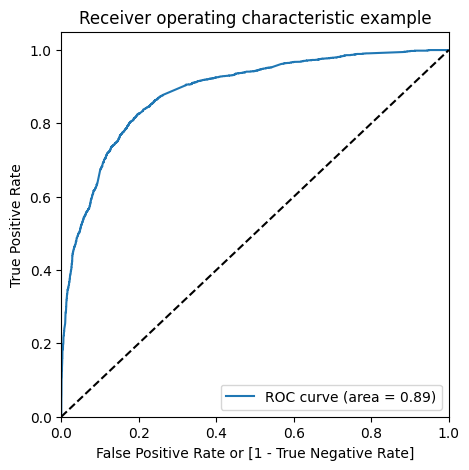

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

> **Reading: ROC Curve area is almost 90%, this signifies our model is good model.**

### **Finding Optimal Probablity cut off**
To conclude Conversion for each record.

In [ ]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.197039,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.129235,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.327869,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865142,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.799611,7987,1,1,1,1,1,1,1,1,1,0,0


In [ ]:
cutoff_df = pd.DataFrame( columns = ["probability","accuracy","sensitivity","specificity"])
from sklearn.metrics import confusion_matrix
nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.585735     0.973426     0.342894
0.2          0.2  0.747914     0.915781     0.642766
0.3          0.3  0.801291     0.849141     0.771319
0.4          0.4  0.816407     0.771872     0.844302
0.5          0.5  0.816407     0.704415     0.886556
0.6          0.6  0.797355     0.600572     0.920615
0.7          0.7  0.785546     0.529027     0.946223
0.8          0.8  0.760668     0.423140     0.972087
0.9          0.9  0.720516     0.293949     0.987708


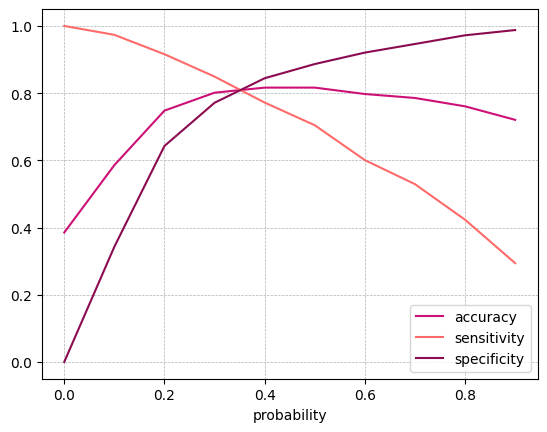

In [ ]:
cutoff_df.plot.line(x = "probability", y=["accuracy","sensitivity","specificity"], color=["#CD1076", "#FF6A6A", "#8B0A50"])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

> **Reading: From the curve above, it is clear that the Optimal Probability vusttoff point is 0.35**

### **Correct Final Prediction Column**

In [ ]:
y_train_pred_final['Final_Prediction'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
0,0,0.197039,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.129235,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.327869,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865142,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.799611,7987,1,1,1,1,1,1,1,1,1,0,0,1


### **Assingning Lead Score to the Training Data**

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction,Lead_Score
0,0,0.197039,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.129235,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.327869,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.865142,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.799611,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


# **Model Evaluation**

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Prediction))

Accuracy : 0.812627932609038


> **So the accuracy is 81.26% which is great.**

In [ ]:
confusion_matrix_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Prediction )
confusion_matrix_2

array([[3184,  721],
       [ 469, 1977]])

**According to the metrics:**

True Negatives = 3184

False Positives = 721

False Negatives = 469

True Positives = 1977

In [ ]:
# true positive
TP = confusion_matrix_2[1,1]
# true negatives
TN = confusion_matrix_2[0,0]
# false positives
FP = confusion_matrix_2[0,1]
# false negatives
FN = confusion_matrix_2[1,0]

In [ ]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8082583810302535


> **Sensitivity is 80.26% which is great.**

In [ ]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8153649167733675


> **Sensitivity is 81.54% which is also good.**

In [ ]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.18463508322663252


> **False Positive rate is very low - 18.46% which is good.**

In [ ]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7327650111193477


> **Positive Predictive Value is 73.28%.**

In [ ]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8716123733917328


> **Negative Predictive Value is 87.16%.**

### **Precision and Recall**

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3462,  443],
       [ 723, 1723]])

In [ ]:
TP / TP + FP
print("Precision : ", confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7954755309325946


> **Precision is 79.55% (almost 80%).**

In [ ]:
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7044153720359771


> **Recall is 70.44%.**

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))

Precision : 0.7954755309325946


In [ ]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Recall : 0.7044153720359771


**Precision and Recall Trade Off**

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

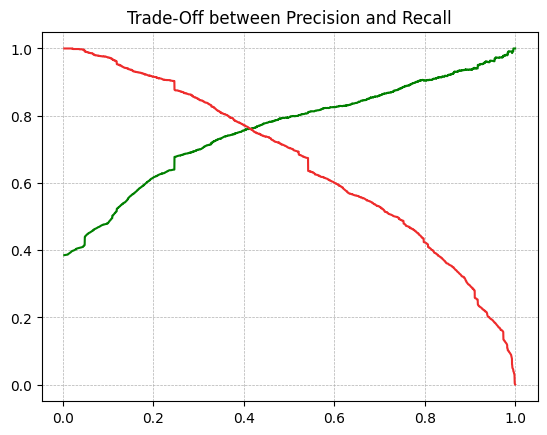

In [ ]:
plt.plot(thresholds, p[:-1], color = "#008000")
plt.plot(thresholds, r[:-1], color = "#EE2C2C")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Trade-Off between Precision and Recall")
plt.show()

**The Trade-Off between Precision and Recall is 0.42. Therefore we can safely say that a probablity of 42% is good enough to be considered as a hot lead.**

# **Making Predictions on Test Data**

> **Scaling and Fitting Test Data**

In [ ]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = model7.predict(X_test_sm)
y_test_pred[:10]

3271    0.130386
1490    0.969730
7936    0.112590
4216    0.806873
3830    0.133111
1800    0.640021
6507    0.341083
4821    0.303338
4223    0.916731
4714    0.327869
dtype: float64

In [ ]:
y_pred_array = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_array.head()

,0
3271,0.130386
1490,0.969730
7936,0.112590
4216,0.806873
3830,0.133111


> **Preparing Test Data**

In [ ]:
# Test data to Dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Assigning Index
y_test_df["Prospect ID"] = y_test_df.index

In [ ]:
y_pred_array.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_array],axis=1)

In [ ]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130386
1,1,1490,0.969730
2,0,7936,0.112590
3,1,4216,0.806873
4,0,3830,0.133111


> **Renaming and Rearranging Columns**

In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : "Converted_probability"})

In [ ]:
y_pred_final = y_pred_final.reindex(columns=["Prospect ID","Converted","Converted_probability"])

In [ ]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability
0,3271,0,0.130386
1,1490,1,0.969730
2,7936,0,0.112590
3,4216,1,0.806873
4,3830,0,0.133111


In [ ]:
y_pred_final["Final_Prediction"] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.34 else 0)

In [ ]:
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,Final_Prediction
0,3271,0,0.130386,0
1,1490,1,0.969730,1
2,7936,0,0.112590,0
3,4216,1,0.806873,1
4,3830,0,0.133111,0


> **Checking Accuracy, Specificity and Sensitivity for test data**

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Prediction))

Accuracy : 0.8049944913698127


**So the accuracy is 80.5% which is great.**

In [ ]:
confusion_matrix_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Prediction )
confusion_matrix_2

array([[1396,  338],
       [ 193,  796]])

**According to the metrics:**

True Negatives = 1396

False Positives = 338

False Negatives = 193

True Positives = 796

In [ ]:
TP = confusion_matrix_2[1,1] # true positive
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

In [ ]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


**Sensitivity is 80.5% which is great.**

In [ ]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8050749711649365


**Specifity is 80.5% which is great.**

# **Assingning Lead Score to the Test Data**

In [ ]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_probability.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,Final_Prediction,Lead_Score
0,3271,0,0.130386,0,13
1,1490,1,0.969730,1,97
2,7936,0,0.112590,0,11
3,4216,1,0.806873,1,81
4,3830,0,0.133111,0,13


Following are the readings on the accuracy, specificity and sensitivity after running the model on our test data:

**Accuracy : 80.5 %**

**Sensitivity : 80.5 %**

**Specificity : 80.5 %**

# **CONCLUSIONS**

## Let's Conclude on the Quality of our Model - Model 7 on Train and Test Data Sets.

### **TRAINING DATA:**
**Accuracy : 81.26 %**

**Sensitivity : 80.26 %**

**Specificity : 81.54 %**

### **TEST DATA:**

**Accuracy : 80.5 %**

**Sensitivity : 80.5 %**

**Specificity : 80.5 %**

Therefore, we can say that the model is a good model and can make predictions with atleast 80% acccuracy specificity and sensitivity.

The **CEO**, in particular, has given a ballpark of the **target lead conversion rate to be around 80%**, **which is achieved**.

Therefore, we can be confident on this model.

## **List of Hot Leads**
- Find out how many
- Retrieve their IDs

In [ ]:
hot_leads = y_pred_final.loc[y_pred_final["Lead_Score"]>=42]
hot_leads

,Prospect ID,Converted,Converted_probability,Final_Prediction,Lead_Score
1,1490,1,0.969730,1,97
3,4216,1,0.806873,1,81
5,1800,1,0.640021,1,64
8,4223,1,0.916731,1,92
14,2570,1,0.618736,1,62
...,...,...,...,...,...
2709,2815,0,0.611724,1,61
2715,6299,1,0.871392,1,87
2716,7852,1,0.541762,1,54
2717,2258,0,0.683122,1,68


**Reading: There are 1024 "Hot Leads" for the sales and marketing team that they can actively make calls and push to enroll as they have high probability of signing up.**

### **List of IDs of Hot Leads**
- Sales team can make calls for these IDs
- All other communication and accquisition marketing initiatives can be directed towards these leads.

In [ ]:
print("The Prospect ID of Hot Leads:")
hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
ids_str = ', '.join(map(str, hot_leads_ids))
print(ids_str)

The Prospect ID of Hot Leads:
1490, 4216, 1800, 4223, 2570, 985, 1946, 2461, 5822, 2684, 5999, 4809, 4959, 8449, 2010, 1405, 4062, 7696, 9049, 9005, 8465, 6676, 1518, 512, 4543, 4830, 1158, 4365, 7596, 2269, 7546, 6629, 1698, 3542, 5330, 7347, 2504, 7220, 5913, 8848, 7674, 4377, 8596, 4003, 8552, 2769, 4963, 6947, 2219, 2556, 4807, 446, 789, 8372, 5805, 1586, 4478, 3758, 5060, 337, 7984, 1561, 5367, 737, 9034, 2176, 2283, 3631, 6582, 6423, 5391, 8286, 9048, 4047, 686, 7174, 4461, 1436, 7552, 5173, 7014, 3932, 4080, 1475, 6626, 6708, 3332, 5785, 6560, 1886, 1867, 8189, 2860, 2311, 4189, 978, 4018, 7253, 4297, 1288, 4091, 2125, 200, 5490, 1995, 8878, 6532, 999, 7517, 8128, 1997, 1170, 4498, 5797, 8687, 831, 2119, 7653, 572, 211, 4149, 76, 5056, 6462, 8255, 2998, 1300, 2682, 6091, 559, 2018, 9169, 5476, 3589, 2208, 2256, 453, 2096, 243, 6743, 7695, 9093, 4426, 3703, 952, 3307, 7181, 7680, 4208, 3217, 8642, 5952, 8719, 2138, 5976, 3976, 5769, 1051, 2124, 4491, 8862, 8692, 78, 4978, 5742, 8

In [ ]:
Potential_leads = y_pred_final.loc[y_pred_final["Converted"]==1]
Potential_leads

,Prospect ID,Converted,Converted_probability,Final_Prediction,Lead_Score
1,1490,1,0.969730,1,97
3,4216,1,0.806873,1,81
5,1800,1,0.640021,1,64
8,4223,1,0.916731,1,92
10,3977,1,0.391061,1,39
...,...,...,...,...,...
2711,2336,1,0.246338,0,25
2712,8874,1,0.327869,0,33
2715,6299,1,0.871392,1,87
2716,7852,1,0.541762,1,54


List of Potential Clients

In [ ]:
print("The Prospect ID of Potential Clients:")
potential_clients_ids = Potential_leads["Prospect ID"].values.reshape(-1)
Pot_ids_str = ', '.join(map(str, potential_clients_ids))
print(Pot_ids_str)

The Prospect ID of Potential Clients:
1490, 4216, 1800, 4223, 3977, 2570, 985, 1946, 2461, 5822, 2684, 4809, 2010, 1405, 4062, 7696, 9049, 9005, 8465, 7298, 6676, 1518, 3765, 1106, 4543, 4830, 1158, 4365, 8039, 7596, 2269, 7546, 6629, 1698, 3065, 3542, 4850, 5330, 7347, 2504, 7220, 5913, 2896, 7674, 747, 4003, 8552, 2769, 4963, 6947, 2556, 4807, 446, 789, 4923, 8372, 5805, 1586, 5516, 6979, 4478, 3758, 5060, 7984, 1561, 5367, 737, 768, 1421, 9034, 7650, 2283, 3631, 5992, 6582, 6423, 5391, 8286, 9048, 4047, 686, 7174, 1436, 7552, 725, 5173, 7014, 3932, 4080, 1475, 3838, 6626, 6708, 3332, 5785, 7230, 6560, 1886, 1867, 8189, 2311, 4018, 7253, 6200, 4297, 4091, 2374, 200, 5860, 5490, 1995, 6532, 8567, 999, 7517, 1170, 4498, 5797, 8687, 831, 2119, 7653, 572, 211, 4149, 76, 4891, 8255, 8233, 1460, 1300, 6091, 2820, 2018, 8389, 9169, 240, 3589, 2208, 2256, 2096, 6743, 9093, 4426, 8385, 3703, 3307, 7897, 7937, 6918, 4208, 3217, 8642, 5952, 8719, 2138, 9004, 944, 5976, 8701, 3976, 5769, 6343, 1

### **Cold Leads**

In [ ]:
cold_leads = y_pred_final.loc[y_pred_final["Lead_Score"]<=30]
cold_leads

,Prospect ID,Converted,Converted_probability,Final_Prediction,Lead_Score
0,3271,0,0.130386,0,13
2,7936,0,0.112590,0,11
4,3830,0,0.133111,0,13
7,4821,0,0.303338,0,30
11,4209,0,0.048094,0,5
...,...,...,...,...,...
2714,6448,0,0.246338,0,25
2718,850,0,0.194512,0,19
2719,2879,0,0.129672,0,13
2721,7155,0,0.113774,0,11


**Reading: There are 1514 Cold Leads for the Education Platform.**

## **Features of Finalised Model**
And what they imply in terms of actions and strategies the company can build around.

In [ ]:
model7.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.808099
Lead Source_Reference                                   3.326513
Last Activity_Had a Phone Conversation                  2.827069
What is your current occupation_Working Professional    2.626247
Last Activity_SMS Sent                                  1.285677
Total Time Spent on Website                             1.096665
Lead Source_Olark Chat                                  1.095209
const                                                  -0.036868
Last Notable Activity_Modified                         -0.885278
Last Activity_Olark Chat Conversation                  -0.981782
Lead Origin_Landing Page Submission                    -1.192291
Specialization_Others                                  -1.202029
Do Not Email                                           -1.510544
dtype: float64

### **Calls/Communication to be pushed to the following customers:**
- Leads coming from Welingak Website.
- Leads coming in through References. References seem to have an impact on being a preference.
- Leads who are working Professionals since they are more inclined to pursue studies online.
- Leads who have spent time on the website exploring options. They are more likely to not only have an idea of the offerings but also be inclined to sign up.
- Leads who have come through Olark Chat.

### **Calls/Communication NOT to be pushed to the following customers:**
- Leads who have opted as "Yes" for "Do Not Email".
- Leads who do not posses a specialisation in any industry.

--------------------------------------------------------------------------------------------------------**END**-------------------------------------------------------------------------------------------------------

Project submitted by:
- Aayushi Singh
- Abhijeet Singh